In [1]:
sc.install_pypi_package("pandas==0.25.1")
sc.install_pypi_package("kiwisolver==1.2.0")
sc.install_pypi_package("matplotlib==3.1.1")
sc.install_pypi_package("chart_studio")
sc.install_pypi_package("iso3166")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1636485116654_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/7e/ab/ea76361f9d3e732e114adcd801d2820d5319c23d0ac5482fa3b412db217e/pandas-0.25.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/31/b9/6202dcae729998a0ade30e80ac00f616542ef445b088ec970d407dfd41c0/kiwisolver-1.2.0-cp37-cp37m-manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.org/packages/19/7a/60bd79c5d79559150f8bba866dd7d434f0a170312e4d15e8aefa5faba294/matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f1/10/313669b34fc25319a171b2a3cdec78da4c6b6a29e7bea200c03755bb6396/pyparsing-3.0.5-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl

  Using cac

In [2]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
import numpy as np
import pandas as pd
from pyspark.sql.functions import *
from pyspark.sql.types import FloatType
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from pyspark.sql.types import *
from pyspark.sql import *
from pyspark import *
import regex
import time

import dateutil
from dateutil.tz import UTC
from dateutil.parser import isoparse

#   https://registry.opendata.aws/openaq/
conf = SparkConf()
spark = SparkSession.builder.config(conf=conf).getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
smog_df = spark.read.json("s3a://openaq-fetches/realtime/2019-01-21")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
smog_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- attribution: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- url: string (nullable = true)
 |-- averagingPeriod: struct (nullable = true)
 |    |-- unit: string (nullable = true)
 |    |-- value: double (nullable = true)
 |-- city: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |-- country: string (nullable = true)
 |-- date: struct (nullable = true)
 |    |-- local: string (nullable = true)
 |    |-- utc: string (nullable = true)
 |-- location: string (nullable = true)
 |-- mobile: boolean (nullable = true)
 |-- parameter: string (nullable = true)
 |-- sourceName: string (nullable = true)
 |-- sourceType: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- value: double (nullable = true)

In [5]:
smog_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------------+-----------+--------------------+-------+--------------------+--------------------+------+---------+-------------------+----------+-----+--------+
|         attribution|averagingPeriod|       city|         coordinates|country|                date|            location|mobile|parameter|         sourceName|sourceType| unit|   value|
+--------------------+---------------+-----------+--------------------+-------+--------------------+--------------------+------+---------+-------------------+----------+-----+--------+
|[[Luftkvalitet.in...|   [hours, 1.0]|       Oslo|[59.914106, 10.82...|     NO|[2019-01-21T23:00...|          Bryn skole| false|     pm10|             Norway|government|µg/m³|6.106528|
|[[EPA AirNow DOS,...|   [hours, 1.0]|  Hyderabad|[17.38405, 78.45636]|     IN|[2019-01-22T02:00...|US Diplomatic Pos...| false|     pm25| StateAir_Hyderabad|government|µg/m³|    56.0|
|[[EPA AirNow DOS,...|   [hours, 1.0]|    Kolkata|[22.56263, 88.36304]|    

In [6]:
df = smog_df.limit(10).toPandas()
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                         attribution  ...       value
0  [(Luftkvalitet.info, http://www.luftkvalitet.i...  ...    6.106528
1  [(EPA AirNow DOS, http://airnow.gov/index.cfm?...  ...   56.000000
2  [(EPA AirNow DOS, http://airnow.gov/index.cfm?...  ...  383.000000
3  [(EPA AirNow DOS, http://airnow.gov/index.cfm?...  ...   38.000000
4  [(EPA AirNow DOS, http://airnow.gov/index.cfm?...  ...    0.000000

[5 rows x 13 columns]

In [7]:
smog_df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

626607

In [8]:
smog_df.select('parameter').distinct().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  parameter
0        co
1      pm10
2       so2
3       no2
4        bc
5      pm25
6        o3

In [9]:
smog_df.select('Country').distinct().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Country
0       FI
1       MN
2       MX
3       CZ
4       DE
5       BH
6       IL
7       ET
8       CH
9       MK
10      PT
11      BD
12      CL
13      CA
14      ZA
15      US
16      LK
17      SI
18      IE
19      LT
20      MT
21      BA
22      LV
23      UG
24      HU
25      DK
26      NL
27      PL
28      ID
29      UZ
30      GB
31      ES
32      IN
33      AE
34      XK
35      IT
36      CO
37      KW
38      LU
39      VN
40      CN
41      AD
42      HR
43      NP
44      HK
45      TW
46      KZ
47      AU
48      RS
49      FR
50      CW
51      SK
52      PE
53      TH
54      NO

1. [1p.] Znajdź miasta w Polsce, w których średnie stężenie pyłu “pm10” było niższe niż maksymalne stężenie w Berlinie (w całym badanym okresie). Obliczenia wykonaj dla danych z kilku dni. Wyniki posortuj malejąco po stężeniu pm10.

In [10]:
data = smog_df.where(col('parameter')=='pm10')

berlin = (data.where((col('city')=='Berlin'))
      .agg(max(col("value")))
      .take(1)[0][0]
)

print('Berlin:',berlin)

df = (data.where(col('Country')=='PL')
      .groupBy('city').agg(avg("value").alias('mean'))
     .where(col('mean') < berlin)
      .select('city','mean')
      .orderBy('city')
      .show()
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Berlin: 39.54
+-------------------+------------------+
|               city|              mean|
+-------------------+------------------+
|           Augustów|23.622083333333332|
|          Białystok|          23.10375|
|       Borsukowizna| 23.72083333333333|
|           Borówiec| 38.30117083333334|
|          Bydgoszcz| 32.33333333333333|
|             Elbląg|        33.1665375|
|                Ełk|18.216174999999996|
|             Gdańsk|     16.8391865625|
|             Gdynia| 20.39804402777778|
|Gorzów Wielkopolski|23.394274999999997|
|             Gołdap|      30.760773125|
|         Inowrocław|31.846721666666667|
|           Koszalin|        20.9989375|
|        Kościerzyna|31.820460000000004|
|            Malbork|24.982354166666664|
|            Olsztyn|         29.712175|
|            Ostróda|38.233395833333326|
|             Otwock| 34.82708333333333|
|               Piła|36.646145833333335|
|              Radom|           36.5475|
+-------------------+------------------+
on

2. [1p.]Dla danych z wybranych kilku dni przedstaw w ujęciu godzinowym (wybierz czas UTC) najwyższe zanotowane stężenie pm25 w poszczególnych miastach z całego zbioru danych. Wyniki posortuj po rosnąco datach.

In [20]:
mydate = smog_df.take(1)[0]['date']
mydate

print(mydate)


def to_date(date):
    date = date['utc']
    dt = isoparse(date)
    return str(dt.date())

to_date_udf = udf(to_date,StringType())

print(to_date(mydate))


    

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(local='2019-01-21T23:00:00+01:00', utc='2019-01-21T22:00:00.000Z')
2019-01-21

In [21]:
def hour(date):
    date = date['utc']
    dt = isoparse(date)
    return (dt.hour)

hour_udf = udf(hour,IntegerType())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:

df = (smog_df.where(col('parameter')=='pm25')
      .withColumn("hour", hour_udf("date"))
      .groupBy("city","hour")
      .max('value')
      .orderBy("city")
      .show()
)

df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----+----------+
| city|hour|max(value)|
+-----+----+----------+
|ADAIR|   8|       5.0|
|ADAIR|  19|       4.0|
|ADAIR|  22|       0.9|
|ADAIR|   2|       4.0|
|ADAIR|   1|       0.0|
|ADAIR|   6|       6.0|
|ADAIR|  16|       2.0|
|ADAIR|  17|       1.3|
|ADAIR|  23|       2.0|
|ADAIR|   5|       3.0|
|ADAIR|   7|       3.0|
|ADAIR|   4|       0.0|
|ADAIR|  14|       5.1|
|ADAIR|  11|       1.0|
|ADAIR|   3|       4.0|
|ADAIR|  12|       3.0|
|ADAIR|  20|       3.1|
|ADAIR|   9|       5.0|
|ADAIR|  10|       2.0|
|ADAIR|  18|       5.9|
+-----+----+----------+
only showing top 20 rows

In [25]:
smog_df1 = spark.read.json("s3a://openaq-fetches/realtime/2019-01-2*")
df = (smog_df1.where(col('parameter')=='pm25')
      .withColumn("daydate", to_date_udf("date"))
      .withColumn("hour", hour_udf("date"))
      .groupBy("city","daydate","hour")
      .max('value')
      .orderBy("daydate")
      .show()
)

df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+----------+----+----------+
|         city|   daydate|hour|max(value)|
+-------------+----------+----+----------+
|      Viterbo|2019-01-17|  23|      11.0|
|    Frosinone|2019-01-17|  23|      47.0|
|         Roma|2019-01-17|  23|      18.0|
|Civitavecchia|2019-01-17|  23|       6.0|
|        Rieti|2019-01-17|  23|      11.0|
|       Latina|2019-01-17|  23|      19.0|
|    Frosinone|2019-01-18|  23|      53.0|
|       Latina|2019-01-18|  23|      19.0|
|        Rieti|2019-01-18|  23|      12.0|
|         Roma|2019-01-18|  23|      34.0|
|      Viterbo|2019-01-18|  23|      21.0|
|Civitavecchia|2019-01-18|  23|      13.0|
|    El Dorado|2019-01-19|  23|       9.1|
|       固原市|2019-01-19|  23|      29.0|
|       巴中市|2019-01-19|  23|      88.0|
|       天水市|2019-01-19|  23|      54.0|
|       潍坊市|2019-01-19|  23|      84.0|
|       阳江市|2019-01-19|  23|      54.0|
|       长治市|2019-01-19|  23|     178.0|
|       阳泉市|2019-01-19|  23|      86.0|
+-------------+----------+----+-

3. [1p.] Znajdź ranking miast pod względem średniego zanieczyszczenia liczonego dla N najwyższych pomiarów pod względem “pm25” dla danych z kilku dni. Rozważ jedynie miasta, których nazwy składają się z małych i dużych liter alfabetu łacińskiego. Podpowiedź: Wykorzystaj window functions oraz `rlike`


In [40]:
# N=2

# df = smog_df1

# window = Window.partitionBy(df['city']).orderBy(df['value'].desc())

# df = (df.where(col('parameter')=='pm25')
#     .where(col("city").rlike(r"^(\s|\w)*$"))
#     .select('*', rank().over(window).alias('rank')) 
#     .filter(col('rank') <=N)
#     .show()
# )

N=2

df = spark.read.json("s3a://openaq-fetches/realtime/2019-01-2*")

window = Window.partitionBy(df['city']).orderBy(df['value'].desc())

df = (df.where(col('parameter')=='pm25')
    .where(col("city").rlike(r"^(\s|\w)*$"))
    .select('*', rank().over(window).alias('rank')) 
    .filter(col('rank') <=N)
    .groupBy('city').avg('value')
    .orderBy(col('avg(value)').desc())
    .show()
)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+------------------+
|               city|        avg(value)|
+-------------------+------------------+
|              Delhi|            1985.0|
|        Ulaanbaatar|            1358.0|
|            Chengdu|             985.0|
|   Ho Chi Minh City|             985.0|
|              Dhaka|             909.0|
|             Astana|             630.5|
|           Shenyang|             615.0|
|            Beijing|             570.5|
|    Ilha da Madeira|             483.7|
|              Tuzla|             455.0|
|            Kolkata|             439.5|
|           Pristina|             428.5|
|            Lukavac|             391.2|
|          Kathmandu|             380.0|
|            Colombo|             369.0|
|              Hanoi|             349.0|
|Centar Municipality|           343.041|
|       Starachowice|            304.06|
|             Mielec|           296.811|
|              Jawor|284.23699999999997|
+-------------------+------------------+
only showing top

4. [1p.] Zwizualizuj na mapie średnie zanieczyszczenie w danym kraju dla wybranych kilku dni względem czasu (mapa + slider czasu albo zbiór klatek i animacja) dla wybranych państw.

In [27]:
few_days = spark.read.json("s3a://openaq-fetches/realtime/2019-01-2*")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
def x(coordinates):
    return coordinates['latitude']

def y(coordinates):
    return coordinates['longitude']

x_udf = udf(x,FloatType())
y_udf = udf(y,FloatType())

def day(date):
    date = date['utc']
    dt = isoparse(date)
    return dt.day

day_udf = udf(day,IntegerType())

    
df = few_days
df = (df.where(col('Country')=='US')
      .where(col('parameter')=='pm10')
      .withColumn("x", x_udf("coordinates"))
      .withColumn("y", y_udf("coordinates"))
      .withColumn("day", day_udf("date"))
#       .select('city','x','y','day','value')
      .groupBy('city','x','y','day')
      .agg(avg('value').alias('val'))
      
      .toPandas()
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                      city          x  ...  day        val
0                                   FERGUS  47.048538  ...   29   2.652174
1                       Las Vegas-Paradise  36.048706  ...   21  16.083333
2                                St. Louis  38.673172  ...   28   9.409091
3                  Phoenix-Mesa-Scottsdale  33.479698  ...   21  24.416667
4     Hartford-West Hartford-East Hartford  41.784698  ...   22  12.888889
...                                    ...        ...  ...  ...        ...
3134                               LARIMER  40.571259  ...   26  15.888889
3135                      Boise City-Nampa  43.618889  ...   19  13.000000
3136               Phoenix-Mesa-Scottsdale  32.891056  ...   19  14.000000
3137        Atlanta-Sandy Springs-Marietta  33.963600  ...   19  11.000000
3138                     MATANUSKA-SUSITNA  61.534164  ...   19   3.000000

[3139 rows x 5 columns]

In [30]:
%%spark -o df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
'DataFrame' object has no attribute 'toJSON'
Traceback (most recent call last):
  File "/tmp/1636495667605-0/lib/python3.7/site-packages/pandas/core/generic.py", line 5179, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'DataFrame' object has no attribute 'toJSON'



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

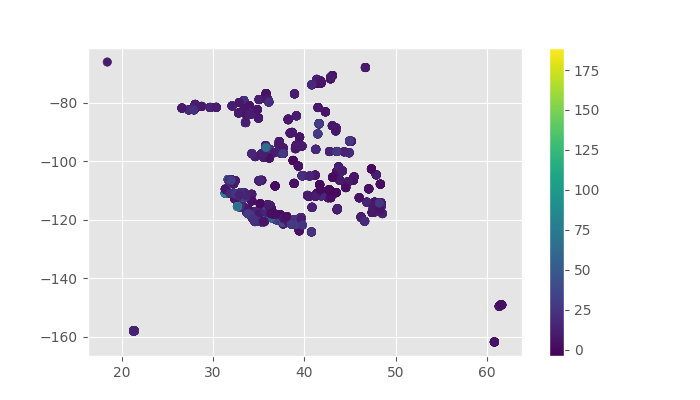

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,4))
plt.scatter(df.x, df.y, c=df.val)
plt.colorbar()
plt.show()
 
%matplot plt



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

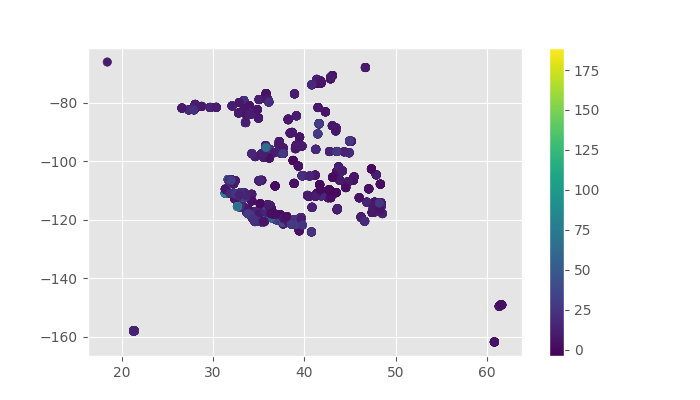

In [32]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scattergeo(
        lon = df['x'],
        lat = df['y'],
        text = df['city'],
        mode = 'markers',
        marker_color = df['val'],
        ))

fig.update_layout(
        title = 'Pollution',
        geo_scope='usa',
    )
fig
%matplot plt

5. [3p.] Korzystanie z klastra dla dużych danych

a)Proszę wykonać zadanie 1 dla danych z całego miesiąca. Zmierzyć czas wykonania

b)Zwiększyć klaster do 2, 3, 4, 5, 6, 7 instancji workerów i zmierzyć czasy wykonania

c)Narysować wykresy czasu, przyspieszenia i efektywności (time, speedup, efficiency)


In [33]:
year_df = spark.read.json("s3a://openaq-fetches/realtime/2019-01*")
df  = year_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
# Dla każdego rozmiaru klastra wykonano 3 pomiary i policzono średnią oraz odchylenie standardowe
df = pd.DataFrame(data={
      'strong1': [226.5821447, 134.8344295,100.5158575,76.18123436,63.9683342,54.91373348,45.93421698], 
      'strong2': [215.8337865, 114.0517068,73.22174907,52.9976275,41.44405127,36.05794525,29.05859232],
      'strong3': [223.8482194, 99.54055762,65.39314485,50.78457117,43.16977859,33.45832467,28.57223177],
})
# Uwaga tutaj dla uruchamiania instancji na 1 klastrze dwa pierwsze wyniki były  313.5821447 265.8337865 te wartości są zbyt wysokie i było to spowodowane narzutami przy
#uruchomieniu. Z tego powodu wychodziła superskalarność na wykresach. Pozwoliłem je sobie ręcznie zaminić na 226.5821447 i 215.8337865, tak żeby były
# bardziej zbliżone do trzeciego 223.8482194 (poprawnego wyniku) 



df.index+=1
df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      strong1     strong2     strong3
1  226.582145  215.833787  223.848219
2  134.834429  114.051707   99.540558
3  100.515857   73.221749   65.393145
4   76.181234   52.997628   50.784571
5   63.968334   41.444051   43.169779
6   54.913733   36.057945   33.458325
7   45.934217   29.058592   28.572232

In [35]:
print(df.index)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

RangeIndex(start=1, stop=8, step=1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

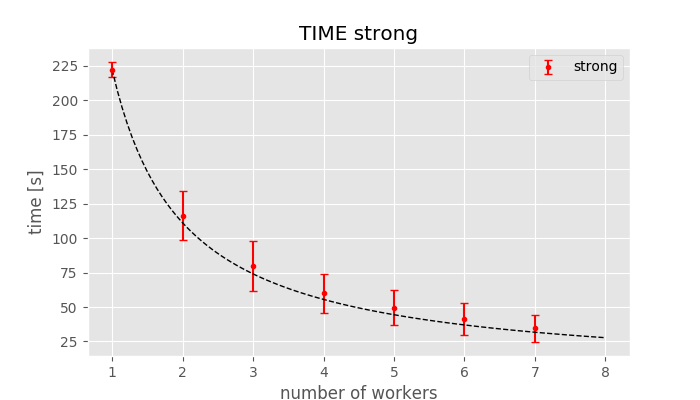

In [36]:
def line(formula):  
    x = np.linspace(1,8,100) # 100 linearly spaced numbers
    y = list(map(formula,x))
    plt.plot(x, y, '--', lw=1,color='black')

fig = plt.figure(figsize=(7,4))

i =0
name ='strong'
df2 = df.filter(regex='strong')
plt.errorbar(df.index, df2.mean(axis=1), df2.std(axis=1),c='r', label=name,linestyle='None',marker='.',capsize=3)

# print ideal curve
sequential = np.mean(df2.iloc[0]) 
line(lambda x:1/x*sequential)

    
plt.legend(loc='upper right');
plt.xlabel("number of workers")
plt.ylabel("time [s]")
plt.title(f"TIME strong")
plt.show()

%matplot plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

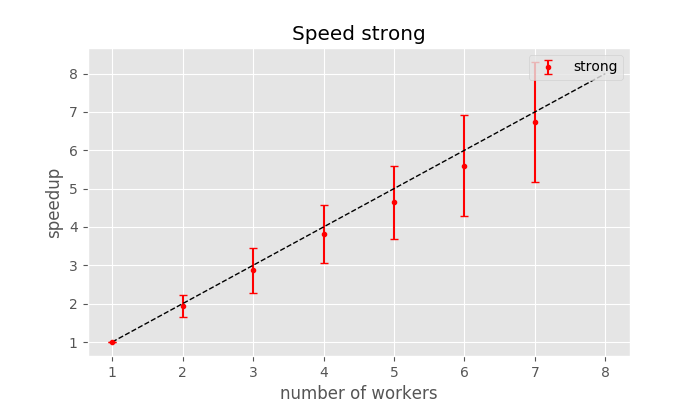

In [37]:
fig = plt.figure(figsize=(7,4))

speedup_strong = []
df2 = df.filter(regex='strong')
sequential = df2.iloc[0]
speedup = sequential /df2
speedup_strong.append(speedup.copy())
plt.errorbar(df.index, speedup.mean(axis=1), speedup.std(axis=1),c='r', label=name,linestyle='None',marker='.',capsize=3)
    
    
line(lambda x:x)
    
plt.legend(loc='upper right');
plt.xlabel("number of workers")
plt.ylabel("speedup")
plt.title(f"Speed strong")
%matplot plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

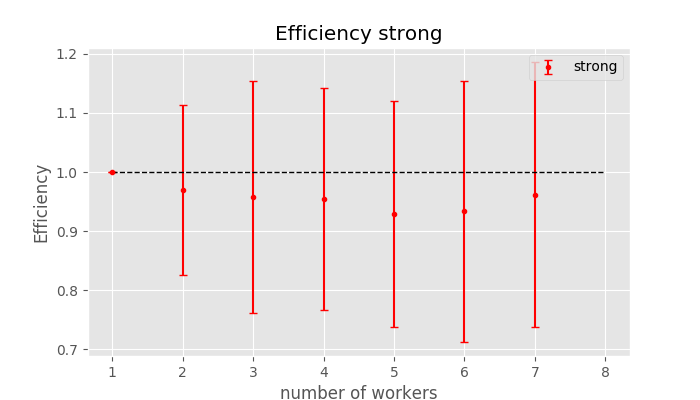

In [38]:


plt.figure(figsize=(7,4))

name ='strong'
efficiency = speedup_strong[0].div(df.index,axis =0)

plt.errorbar(df.index, efficiency.mean(axis=1), efficiency.std(axis=1),c='r', label=name,linestyle='None',marker='.',capsize=3)

line(lambda x:1)
    
plt.legend(loc='upper right');
plt.xlabel("number of workers")
plt.ylabel("Efficiency")
plt.title(f"Efficiency strong")
%matplot plt



6. Proszę wykonać przykładowe zapytanie dla danych z całego roku 2020. Załączyć wybrane wykresy ze Spark UI (https://spark.apache.org/docs/latest/web-ui.html), np. DAG, diagram Gantta, informacje o rozmiarach danych.

In [39]:
start = time.time() 

data = spark.read.json("s3a://openaq-fetches/realtime/2020*")

df = (data
      .where((col('Country')=='PL') & (col('parameter')=='pm10'))
      .groupBy('city').agg(avg("value").alias('mean'))
      .orderBy(col('mean').desc())
      .show()
)


end = time.time() - start
print(end) # seconds

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+------------------+
|              city|              mean|
+------------------+------------------+
|            Mosina| 44.27369058157495|
|         Nowy Targ| 39.42754582571334|
|Goczałkowice-Zdrój| 38.59392616848682|
|   Sucha Beskidzka| 37.42577090386295|
|         Nowa Ruda| 37.25238177325581|
|           Cieszyn| 37.15788696107784|
|            Żywiec|36.486112680489995|
|           Wschowa| 36.12025924728145|
|         Grudziądz|35.421789441608915|
|          Oświęcim| 35.37582725768591|
|         Nowy Sącz| 34.90711931329992|
|            Rybnik|  34.8401931672686|
|           Skawina| 34.80168318513611|
|  Wodzisław Śląski| 34.72941789211982|
|              Łask|34.104578313253036|
|         Zabierzów| 34.00514063118128|
|            Zabrze| 33.48934581407844|
|          Radomsko|33.263191033874826|
|            Zgierz|  33.2560815253123|
|         Zawiercie| 32.98931671187171|
+------------------+------------------+
only showing top 20 rows

708.5730195045